In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("bodyfat (1) (1).csv")
df.columns


Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Biceps', 'Forearm'],
      dtype='object')

In [4]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Biceps,Forearm
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,32.0,27.4
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,30.5,28.9
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,28.8,25.2
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,32.4,29.4
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,32.2,27.7


In [5]:
df['Weight'] /= 2.2 # converting to kg
df['Height'] *= 2.5 # converting to cm

In [6]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Biceps,Forearm
0,1.0708,12.3,23,70.113636,169.375,36.2,93.1,85.2,94.5,59.0,32.0,27.4
1,1.0853,6.1,22,78.750000,180.625,38.5,93.6,83.0,98.7,58.7,30.5,28.9
2,1.0414,25.3,22,70.000000,165.625,34.0,95.8,87.9,99.2,59.6,28.8,25.2
3,1.0751,10.4,26,83.977273,180.625,37.4,101.8,86.4,101.2,60.1,32.4,29.4
4,1.0340,28.7,24,83.750000,178.125,34.4,97.3,100.0,101.9,63.2,32.2,27.7


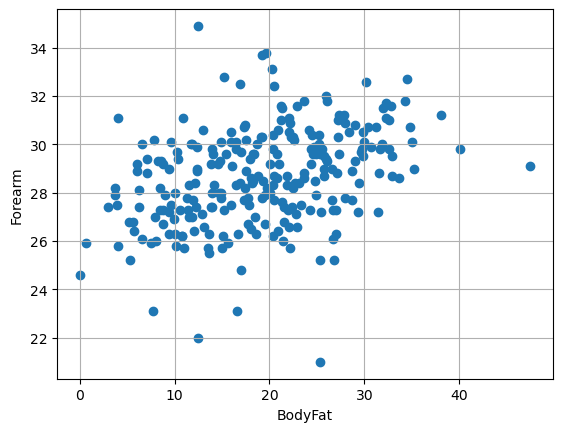

In [12]:
plt.scatter(df.BodyFat, df.Forearm )
plt.xlabel('BodyFat')
plt.ylabel('Forearm')
plt.grid()

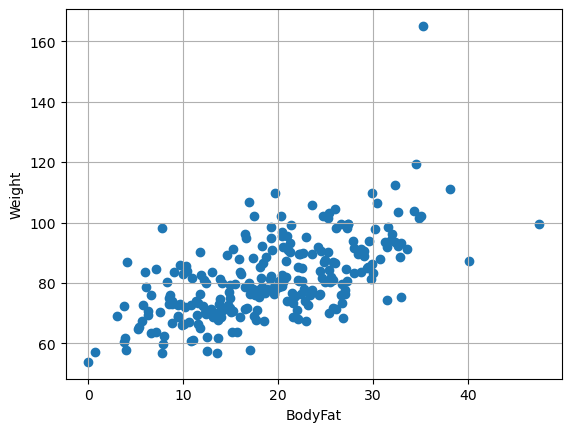

In [13]:
plt.scatter(df.BodyFat, df.Weight )
plt.xlabel('BodyFat')
plt.ylabel('Weight')
plt.grid()

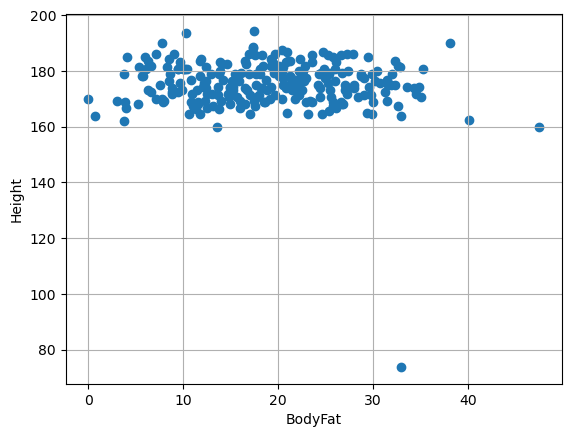

In [14]:
plt.scatter(df.BodyFat, df.Height )
plt.xlabel('BodyFat')
plt.ylabel('Height')
plt.grid()

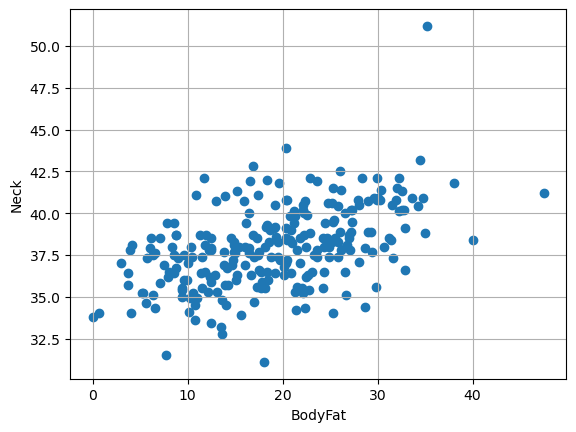

In [15]:
plt.scatter(df.BodyFat, df.Neck )
plt.xlabel('BodyFat')
plt.ylabel('Neck')
plt.grid()

In [6]:
x=df.iloc[:,2:].values
y=df.iloc[:,1:2].values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as sm
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size =0.2,random_state=0)

In [8]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(201, 10) (51, 10)
(201, 1) (51, 1)


In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error

In [10]:

model=RandomForestRegressor(n_estimators=20,random_state=0)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test,Y_pred)
print("R^2 score = ",round(r2_score(Y_test,Y_pred),2))
print(f'the mean absolute error for linear regression trained on BodyFat column is {round(mae, 2)}')


R^2 score =  0.78
the mean absolute error for linear regression trained on BodyFat column is 3.38


C:\Users\adity\AppData\Local\Temp\ipykernel_8196\1546481446.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


In [11]:
inp_gender = 'female'
inp_age = 22
inp_weight = 78
inp_height = 180
inp_neck = 38
inp_chest = 93
inp_abdomen = 83
inp_hip = 99
inp_thigh = 58
inp_biceps = 30
inp_forearm = 29


inp = [ inp_age, inp_weight, inp_height, inp_neck, inp_chest,
      inp_abdomen, inp_hip, inp_thigh, inp_biceps, inp_forearm]
predict = model.predict([[ inp_age, inp_weight, inp_height, inp_neck, inp_chest,
      inp_abdomen, inp_hip, inp_thigh, inp_biceps, inp_forearm]])
print(predict[0])

7.849999999999999


In [14]:
import pickle
pickle.dump(model,open('model1.pkl','wb'))